In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.drop(['PassengerId','Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [6]:
null_values= df_train.isnull().sum()
print("Number of Null Values: ")
print(null_values)

Number of Null Values: 
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [7]:
null_values= df_train.isnull().sum()
print("Number of Null Values After Handling: ")
print(null_values)

Number of Null Values After Handling: 
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


0    549
1    342
Name: Survived, dtype: int64


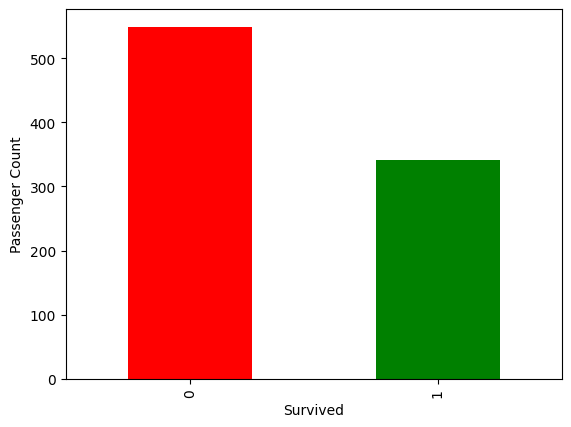

In [8]:
survived = df_train['Survived'].value_counts()
survived.plot(kind='bar', color=['red', 'green'])
plt.ylabel('Passenger Count')
plt.xlabel('Survived')
print(survived)

In [9]:
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


S    644
C    168
Q     77
Name: Embarked, dtype: int64


Text(0.5, 0, 'Passenger Embarked')

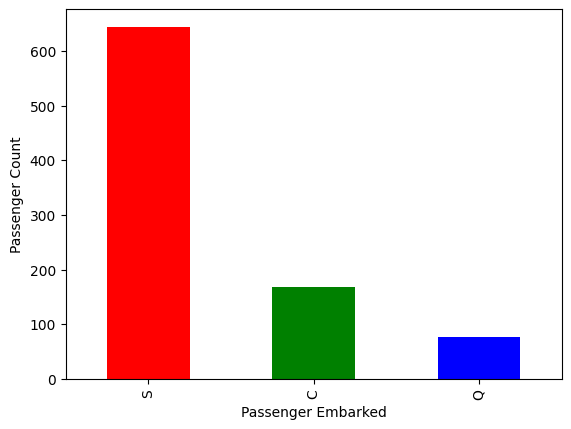

In [10]:
embarked_counts = df_train['Embarked'].value_counts()
print(embarked_counts)
embarked_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.ylabel('Passenger Count')
plt.xlabel('Passenger Embarked')

In [11]:
most_frequent_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(most_frequent_embarked, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
df_train['FamilySize'] = 1 + df_train['SibSp'] + df_train['Parch']
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2


In [13]:
age_bins = [0, 18, 35, 50, float('inf')]
age_labels = ['Child', 'Young', 'Middle-aged', 'Adult']

df_train['AgeCategory'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels, right=False)

Young          543
Middle-aged    161
Child          113
Adult           74
Name: AgeCategory, dtype: int64


Text(0.5, 0, 'Age Category')

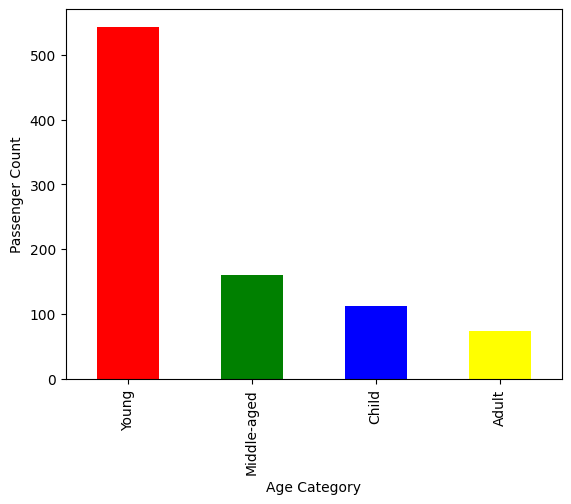

In [14]:
AgeCategory_counts = df_train['AgeCategory'].value_counts()
print(AgeCategory_counts)
AgeCategory_counts.plot(kind='bar', color=['red', 'green', 'blue', 'yellow'])
plt.ylabel('Passenger Count')
plt.xlabel('Age Category')

In [15]:
from sklearn import preprocessing
encoded = preprocessing.LabelEncoder()
df_train['Sex']= encoded.fit_transform(df_train['Sex'])
df_train['Embarked']= encoded.fit_transform(df_train['Embarked'])
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeCategory
0,0,3,1,22.0,1,0,7.2500,2,2,Young
1,1,1,0,38.0,1,0,71.2833,0,2,Middle-aged


In [16]:
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_train[numerical_features])

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df = pd.concat([df_train[['Survived', 'Sex', 'Embarked']], pca_df], axis=1)

print(pca_df.head())

   Survived  Sex  Embarked        PC1       PC2
0         0    1         2 -25.147082 -7.074319
1         1    0         0  39.289381  7.309311
2         1    0         2 -24.380158 -3.040941
3         1    0         2  21.036495  4.776406
4         0    1         2 -24.024115  5.943282


<Axes: xlabel='Survived', ylabel='FamilySize'>

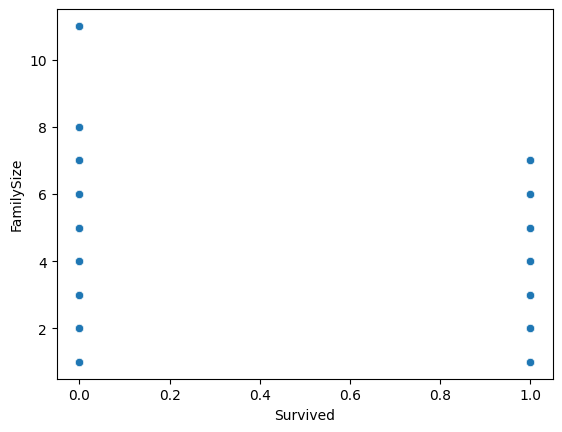

In [17]:
sns.scatterplot(x='Survived', y='FamilySize', data=df_train)

<Axes: xlabel='Fare', ylabel='Age'>

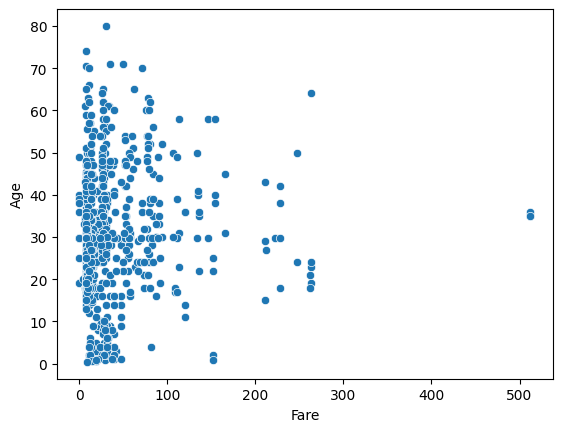

In [18]:
sns.scatterplot(x='Fare', y='Age', data=df_train)

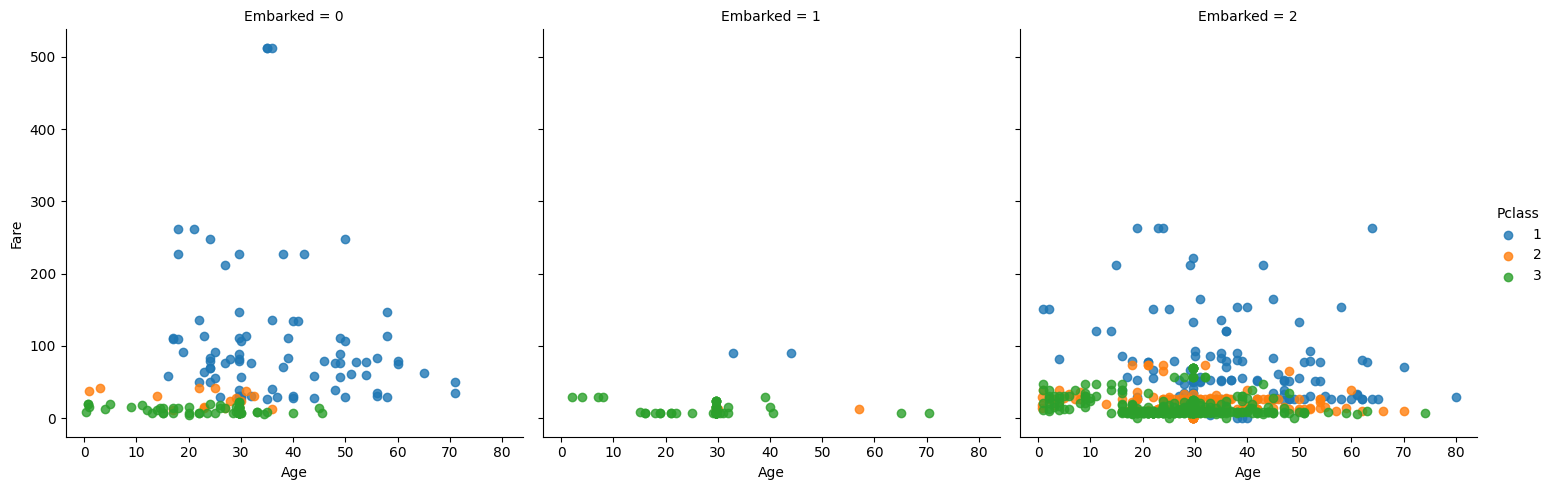

In [19]:
sns.lmplot(x='Age', y='Fare', data=df_train, hue='Pclass',fit_reg=False,  col='Embarked')

plt.show()

<ipython-input-20-c2f071cd20bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


<Axes: >

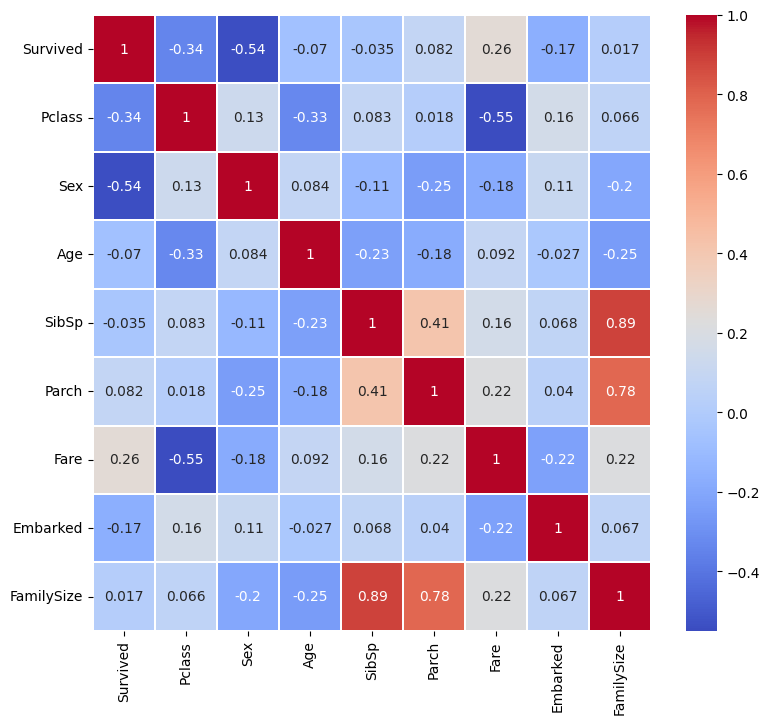

In [20]:
corr_matrix = df_train.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='coolwarm', annot=True, linewidths=0.2)

In [21]:
df_train.drop(['AgeCategory'], axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.000000,1,0,7.2500,2,2
1,1,1,0,38.000000,1,0,71.2833,0,2
2,1,3,0,26.000000,0,0,7.9250,2,1
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1
887,1,1,0,19.000000,0,0,30.0000,2,1
888,0,3,0,29.699118,1,2,23.4500,2,4
889,1,1,1,26.000000,0,0,30.0000,0,1


In [22]:
features = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']]

In [23]:
num_clusters = range(1, 30)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

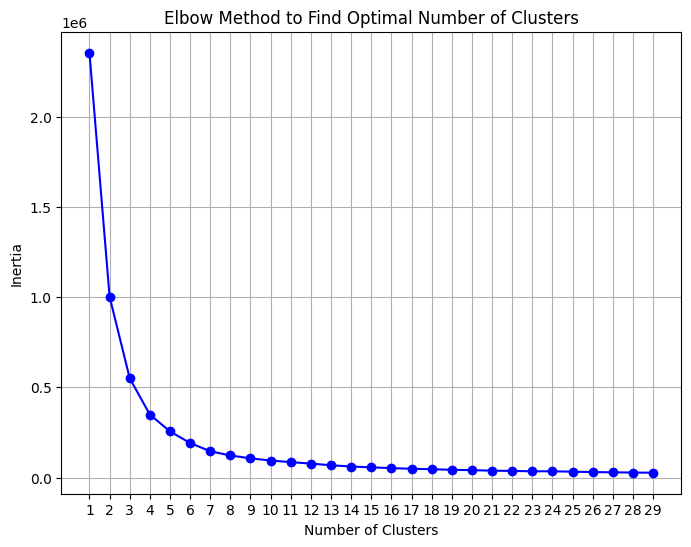

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()

In [25]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_train['Cluster'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
cluster_analysis = df_train.groupby('Cluster').mean()
cluster_analysis

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
Cluster,,,,,,,,,
0,0.320833,2.554167,0.690278,28.762381,0.398611,0.323611,15.053373,1.606944,1.722222
1,0.714286,1.000000,0.285714,31.934756,0.685714,0.914286,190.907020,1.142857,2.600000
2,1.000000,1.000000,0.666667,35.333333,0.000000,0.333333,512.329200,0.000000,1.333333
3,0.624060,1.353383,0.511278,34.054761,1.165414,0.556391,72.457049,1.293233,2.721805


In [27]:
centroids = kmeans.cluster_centers_
centroids

array([[2.55416667e+00, 6.90277778e-01, 2.87623807e+01, 3.98611111e-01,
        3.23611111e-01, 1.50533729e+01, 1.60694444e+00, 1.72222222e+00],
       [1.00000000e+00, 2.85714286e-01, 3.19347563e+01, 6.85714286e-01,
        9.14285714e-01, 1.90907020e+02, 1.14285714e+00, 2.60000000e+00],
       [1.00000000e+00, 6.66666667e-01, 3.53333333e+01, 1.11022302e-16,
        3.33333333e-01, 5.12329200e+02, 2.22044605e-16, 1.33333333e+00],
       [1.35338346e+00, 5.11278195e-01, 3.40547612e+01, 1.16541353e+00,
        5.56390977e-01, 7.24570489e+01, 1.29323308e+00, 2.72180451e+00]])

In [28]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Cluster
0,0,3,1,22.0,1,0,7.2500,2,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,3
2,1,3,0,26.0,0,0,7.9250,2,1,0
3,1,1,0,35.0,1,0,53.1000,2,2,3
4,0,3,1,35.0,0,0,8.0500,2,1,0


In [29]:
df_train["Cluster"].value_counts()

0    720
3    133
1     35
2      3
Name: Cluster, dtype: int64

<Axes: xlabel='Fare', ylabel='Age'>

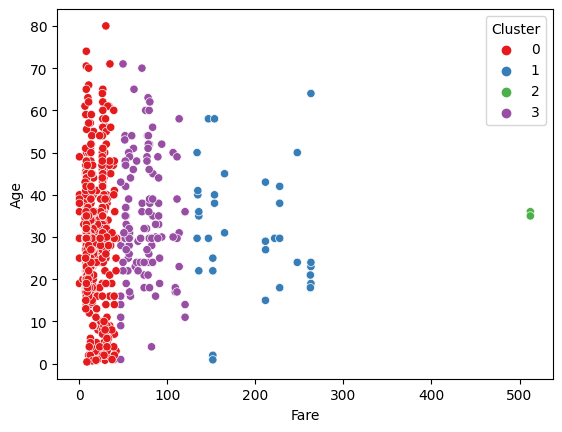

In [30]:
sns.scatterplot(data=df_train, x="Fare", y="Age", hue="Cluster", palette='Set1')